# 최단 경로 알고리즘

가장 짧은 경로를 찾는 알고리즘(='길 찾기' 문제)
- 한 지점에서 다른 한 지점까지의 최단 경로
- 한 지점에서 다른 모든 지점까지의 최단 경로
- 모든 지점에서 다른 모든 지점까지의 최단 경로    
     
     
- 각 지점은 그래프에서 <b>노드</b>로 표현
- 지점 간 연결된 도로는 그래프에서 <b>간선</b>으로 표현

1. 다익스트라 최단 경로 알고리즘
    - 그래프에서 여러 개의 노드가 있을 때, 특정한 노드에서 출발하여 다른 노드로 가는 각각의 최단 경로를 구해주는 알고리즘
    - '음의 간선'이 없을 때 정상적으로 동작 (현실 세계의 도로)
    - 그리디 알고리즘으로 분류
    - '각 노드에 대한 현재까지의 최단 거리'(매 상황에서 가장 비용이 적은 노드 선택) 정보를 항상 1차원 리스트에 저장하며 리스트를 계속 갱신한다.
    
    
2. 플로이드 워셜

## 다익스트라 최단 경로 알고리즘
1. 출발 노드를 설정한다.
2. 최단 거리 테이블을 초기화한다.
3. 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택한다.
4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계산하여 최단 거리 테이블을 갱신한다.
5. 위 과정에서 3과 4번을 반복한다.

    
    
- 방문하지 않은 노드 중에서 가장 최단 거리가 짧은 노드 선택하는 과정을 반복
- 선택된 노드는 '최단 거리'가 완전히 선택된 노드이므로, 더 이상 알고리즘을 반복해도 최단 거리가 줄어들지 않는다. (한 단계당 하나의 노드에 대한 최단 거리를 확실히 찾는 것으로 이해할 수 있다.)

### 간단한 다익스트라 알고리즘

- $O(V^2)$의 시간 복잡도, V: 노드의 개수
- 각 노드에 대한 최단 거리를 담는 1차원 리스트 선언
- 단계마다 '방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택'하기 위해 매 단계마다 1차원 리스트이 모든 원소를 확인(순차탐색)한다.

- 전체 노드의 개수가 5,000개 이하라면 '간단한 다익스트라 알고리즘' 소스코드로 문제 해결 가능.
- 하지만 노드의 개수가 10,000개를 넘어간다면, '개선된 다익스트라 알고리즘'을 이용해야 한다.

**간단한 다익스트라 알고리즘 소스코드**

In [1]:
# import sys
# input = sys.stdin.readline
# 무한을 의미하는 값으로 10억을 설정
INF = int(1e9) # 모든 간선이 정수형으로 표현되는 문제에서 '무한'이라는 값을 대입할 때 사용

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호를 입력받기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n+1)]
# 방문한 적이 있는지 체크하는 목적의 리스트를 만들기
visited = [False] * (n+1)
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n+1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b, c))
    
# 방문하지 않는 노드 중에서, 가장 최단 거리가 짧은 노드의 번호를 반환
def get_smallest_node():
    min_value = INF
    index = 0 # 가장 최단 거리가 짧은 노드(인덱스)
    for i in range(1, n+1):
        if distance[i] < min_value and not visited[i]: # 방문하지 않은 노드 중에서 가장 최단 거리가 짧은 노드의 번호 반환
            min_value = distance[i]
            index = i
    return index

def dijkstra(start):
    # 시작 노드에 대해서 초기화
    distance[start] = 0 # 자기 자신까지의 거리는 0
    visited[start] = True
    for j in graph[start]:
        distance[j[0]] = j[1]
    # 시작 노드를 제외한 전체 n-1개의 노드에 대해 반복
    for i in range(n-1):
        # 현재 최단 거리가 가장 짧은 노드를 꺼내서, 방문 처리
        now = get_smallest_node()
        visited[now] = True
        # 현재 노드와 연결된 다른 노드를 확인
        for j in graph[now]:
            cost = distance[now] + j[1]
            # 현재 노드를 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[j[0]]:
                distance[j[0]] = cost
                
# 다익스트라 알고리즘 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n+1):
    # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if distance[i] == INF:
        print('INFINITY')
    # 도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])

6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2
0
2
3
1
2
4


### 개선된 다익스트라 알고리즘

- 힙 Heap 자료 구조 사용
    - 우선순위 큐를 구현하기 위해 사용하는 자료구조 중 하나
    - 우선순위 큐: 우선순위가 가장 높은 데이터를 가장 먼저 삭제
    - heapq 라이브러리 사용
    - 기본적으로 최소 힙 구조를 이용
- 다익스트라 알고리즘이 동작하는 기본 원리는 동일
- 최단 거리를 저장하기 위한 1차원 리스트(최단 거리 테이블) 이용
- 현재 가장 가까운 노드를 저장하기 위한 목적으로만 우선순위 큐를 추가로 이용
- 전체 시간 복잡도: $O(ElogV)$

**개선된 다익스트라 알고리즘 소스코드**

In [9]:
import heapq
import sys
# input = sys.stdin.readline
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호를 입력받기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n+1)]
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n+1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    a, b, c, = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b, c))
    
def dijkstra(start):
    q = []
    # 시작 노드로 가기 위한 최단 경로는 0으로 설정하여, 큐에 삽입
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q: # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(q)
        # 현재 노드가 이미 처리된 적이 있는 노드라면 무시
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드들을 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n+1):
    # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    # 도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])

6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2
0
2
3
1
2
4


## 플로이드 워셜 알고리즘

- '한 지점에서 다른 특정 지점까지의 최단 경로를 구해야 하는 경우'
- <U>모든 지점에서 다른 모든 지점까지의 최단 경로를 모두 구해야 하는 경우</U>에 사용할 수 있다.

- 매번 방문하지 않은 노드 중에서 최단 거리를 갖는 도르르 찾을 필요가 없다. 

- 2차원 테이블에 최단 거리 정보를 저장한다.
- 다이나믹 프로그래밍 유형에 속한다.
- 시간 복잡도 $O(N^3)$
- 일반적으로 N은 500이하, 그마저도 시간 제한이 작다면 다익스트라로 접근해야 함 

     

- 특정한 노드 k를 거쳐 가는 경우를 확인한다
- a에서 b로 가는 최단 거리보다 a에서 k를 거쳐 b로 가는 거리가 더 짧은지 검사: $ D_{ab} = min(D_{ab}, D_{ak} + D_{kb}) $

**플로이드 워셜 알고리즘 소스코드**

In [15]:
INF = int(1e9) #  무한을 의미하는 값으로 10억을 설정

# 노드의 개수 및 간선의 개수를 입력받기
n = int(input())
m = int(input())
# 2차원 리스트(그래프 표현)을 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n+1) for _ in range(n+1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n+1):
    for b in range(1, n+1):
        if a == b:
            graph[a][b] = 0
            
# 각 간선에 대한 정보를 입력받아, 그 값으로 초기화
for _ in range(m):
    # A에서 B로 가는 비용은 C라고 설정
    a, b, c = map(int, input().split())
    graph[a][b] = c
    
# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, n+1):
    for a in range(1, n+1):
        for b in range(1, n+1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])
            
# 수행된 결과를 출력
for a in range(1, n+1):
    for b in range(1, n+1):
        # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
        if graph[a][b] == INF:
            print("INFINITY", end=" ")
        # 도달할 수 있는 경우 거리를 출력
        else:
            print(graph[a][b], end=" ")
    print()

4
7
1 2 4
1 4 6
2 1 3
2 3 7
3 1 5
3 4 4
4 3 2
0 4 8 6 
3 0 7 9 
5 9 0 4 
7 11 2 0 


---

# 실전 문제

## 미래 도시

In [27]:
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 회사, 경로의 개수(노드, 간선)를 입력 받기
n, m = map(int, input().split())
# 2차원 리스트(그래프 표현)를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n+1) for _ in range(n+1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n+1):
    for b in range(1, n+1):
        if a == b:
            graph[a][b] = 0
            
# 각 간선에 대한 정보를 입력받아, 그 값으로 초기화
for i in range(m):
    # A와 B가 서로에게 가는 비용은 1이라고 설정(양방향 이동이 가능하기 때문)
    a, b = map(int, input().split())
    graph[a][b] = graph[b][a] = 1
    
# 거쳐 갈 노드 X와 최종 목적지 노드 K를 입력받기
destination, meeting = map(int, input().split())

# 점화식에 따라 플로이드 워셜 알고리즘 수행
for k in range(1, n+1):
    for a in range(1, n+1):
        for b in range(1, n+1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])
            
# 수행된 결과를 출력
distance = graph[1][meeting] + graph[meeting][destination]

# 도달할 수 없는 경우, -1을 출력
if distance >= INF:
    print("-1")
# 도달할 수 있다면, 최단 거리를 출력
else:
    print(distance)

5 7
1 2
1 3
1 4
2 4
3 4
3 5
4 5
4 5


## 전보

In [44]:
import heapq
import sys

# input = sys.stdin.readline
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드, 간선의 개수, 시작 노드를 입력받기
n, m, start = map(int, input().split())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n+1)]
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n+1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    x, y, z, = map(int, input().split())
    # x번 노드에서 y번 노드로 가는 비용이 z라는 의미
    graph[x].append((y, z))
    
def dijkstra(start):
    q = []
    # 시작 노드로 가기 위한 최단 경로는 0으로 설정하여, 큐에 삽입
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q: # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(q)
        # 현재 노드가 이미 처리된 적이 있는 노드라면 무시
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드들을 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 도달할 수 있는 노드의 개수
count = 0
# 도달할 수 있는 노드 중에서, 가장 멀리 있는 노드와의 최단 거리
max_distance = 0
for d in distance:
    # 도달할 수 있는 노드인 경우
    if d != INF:
        count += 1
        max_distance = max(max_distance, d)

# 시작 노드는 제외해야 하므로 count-1을 출력
print(count-1, max_distance)

3 2 1
1 2 4
1 3 2
2 4


# 스터디

## 최소비용 구하기
- https://www.acmicpc.net/problem/1916

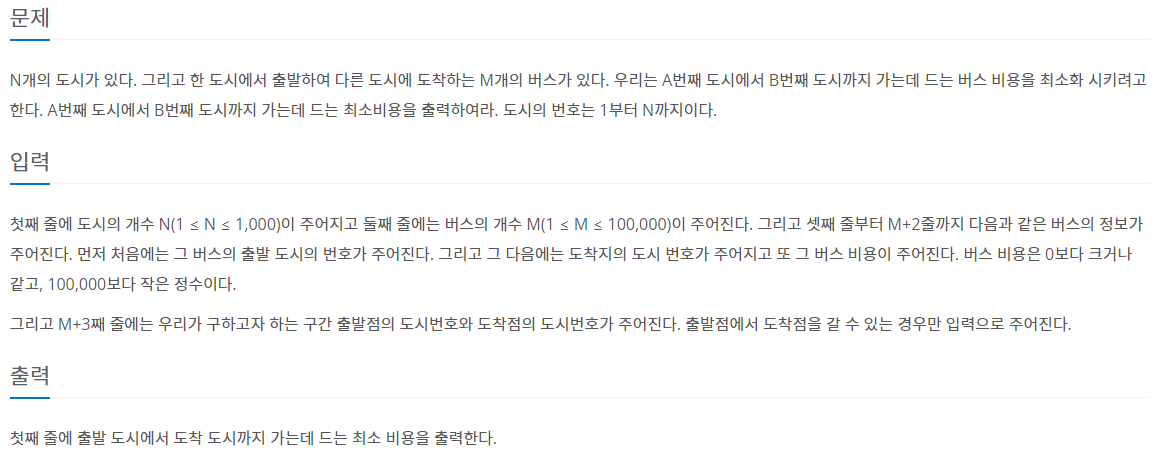

In [4]:
import heapq

INF = int(1e9)
# 노드(도시)의 개수
n = int(input())

# 간선(버스)의 개수
m = int(input())

graph = [[] for _ in range(n+1)]
distance = [INF] * (n+1)

for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b, c))
    
start, end = map(int, input().split())
    
def dijkstra(start):
    q = []
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q:
        dist, now = heapq.heappop(q)
        if distance[now] < dist:
            continue
        for i in graph[now]:
            cost = dist + i[1]
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))
                     
dijkstra(start)
print(distance[end])

5
8
1 2 2
1 3 3
1 4 1
1 5 10
2 4 2
3 4 1
3 5 1
4 5 3
1 5
4


## 경로 찾기
- https://www.acmicpc.net/problem/11403

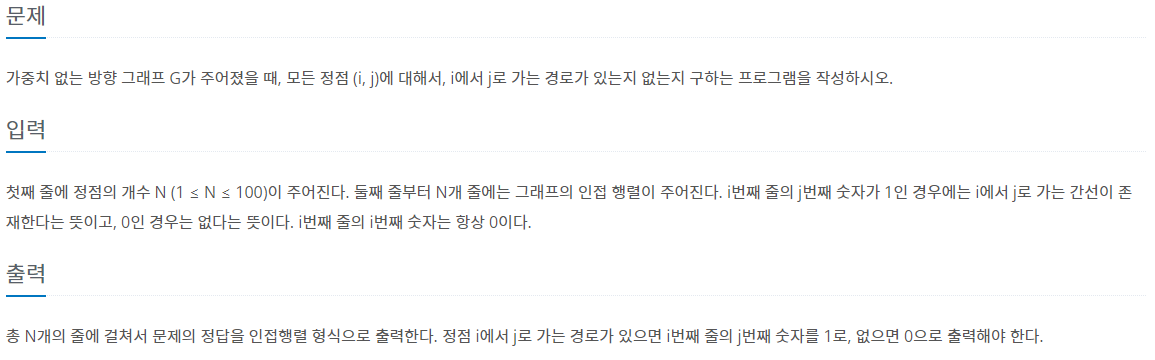

In [7]:
# 정답 처리 됐지만 너무 지저분한 코드...
import sys
input = sys.stdin.readline
INF = int(1e9)

n = int(input())
# 2차원 리스트(그래프 표현)을 만들고, 모든 값을 무한으로 초기화
graph = []

for _ in range(n):
    graph.append(list(map(int, input().split())))

for i in range(n):
    for j in range(n):
        if graph[i][j] == 0:
            graph[i][j] = INF

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(n):
    for a in range(n):
        for b in range(n):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

for i in range(n):
    for j in range(n):
        if graph[i][j] == INF:
            graph[i][j] = 0
        else:
            graph[i][j] = 1

for i in graph:
    print(" ".join(map(str, i)))

3
0 1 0
0 0 1
1 0 0
1 1 1
1 1 1
1 1 1


In [8]:
# 좀 더 깔끔하게 다시 작성한 코드
import sys 
# input = sys.stdin.readline 
n = int(input()) 
graph = [] 
for _ in range(n): 
    graph.append(list(map(int,input().split()))) 

for k in range(n): 
    for i in range(n): 
        for j in range(n): 
            if graph[i][k] and graph[k][j]:
                graph[i][j]=1 
                    
for p in graph:
    print(" ".join(map(str, p)))

3
0 1 0
0 0 1
1 0 0
1 1 1
1 1 1
1 1 1


## 파티
- https://www.acmicpc.net/problem/1238

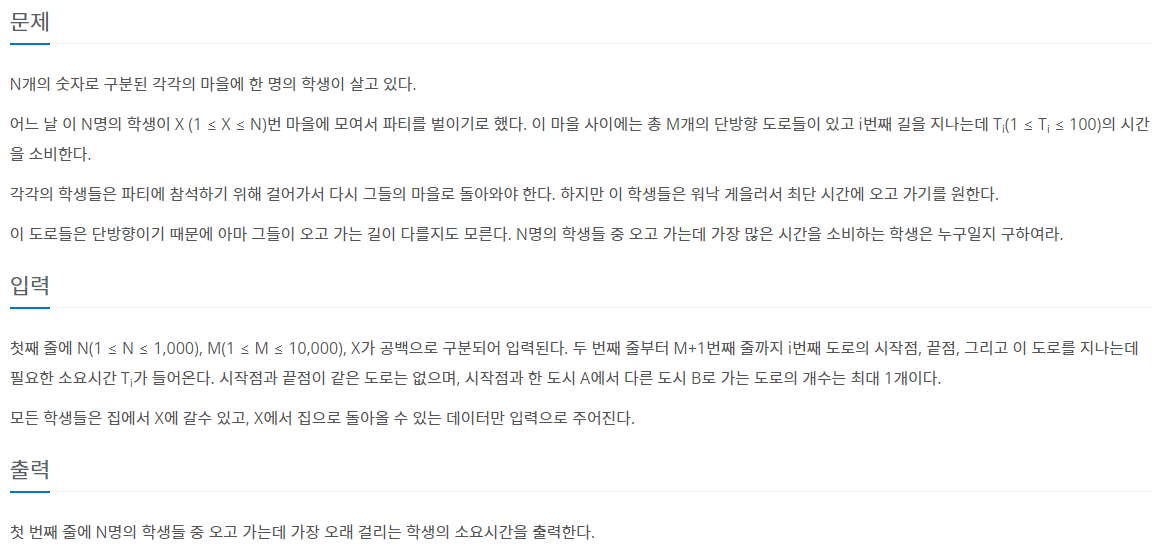

In [1]:
import heapq

INF = int(1e9)

# 노드, 간선의 개수, 목적지
n, m, x = map(int, input().split())

graph = [[] for _ in range(n+1)]

for _ in range(m):
    a, b, t = map(int, input().split())
    graph[a].append((b, t))

def dijkstra(start):
    q = []
    distance = [INF] * (n+1)
    
    heapq.heappush(q, (0, start))
    distance[start] = 0
    
    while q:
        dist, now = heapq.heappop(q)
        if distance[now] < dist:
            continue
        for i in graph[now]:
            cost = dist + i[1]
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))
                
    return distance

ans = 0
for i in range(1, n+1):
    # x까지 걸리는 시간
    go = dijkstra(i)[x]
    # x에서 돌아오는데 걸리는 시간
    back = dijkstra(x)[i]
    ans = max((go+back), ans)
    
print(ans)

4 8 2
1 2 4
1 3 2
1 4 7
2 1 1
2 3 5
3 1 2
3 4 4
4 2 3
10
